<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/GNN%20Graph%20Spectral%20Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install networkx --quiet

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
Graph Spectral Filtering for Graph Signal - Implementation based on KDD2021 Tutorial

This code demonstrates Graph Spectral Filtering as described in the tutorial.
New: Added visualizations to show how edge weights affect spectral properties.

Steps:
1. Create a graph with node features and edge weights.
2. Compute the Graph Laplacian.
3. Perform eigen-decomposition of the Laplacian (Graph Fourier Transform).
4. Define a filter in the spectral domain (e.g., low-pass filter).
5. Apply the filter to the graph signal.
6. Reconstruct the filtered signal (Inverse Graph Fourier Transform).
7. Visualize the original and filtered signals on the graph.
8. NEW: Compare spectral properties with unweighted graph to show edge weight impact.
"""

# Step 1: Create a sample graph with node features and edge weights
print("Step 1: Creating a sample graph...")

# Create a graph (using a small connected graph for clear visualization)
G_weighted = nx.Graph()

# Add nodes with features (each node has a scalar feature for simplicity)
node_features = {
    0: 10.0,  # Feature value for node 0
    1: 25.0,  # Feature value for node 1
    2: 5.0,   # Feature value for node 2
    3: 30.0,  # Feature value for node 3
    4: 15.0,  # Feature value for node 4
    5: 20.0   # Feature value for node 5
}

# Add nodes to the graph
for node_id, feature in node_features.items():
    G_weighted.add_node(node_id, feature=feature)

# Add weighted edges
edges_with_weights = [
    (0, 1, 0.8),  # Strong connection
    (0, 2, 0.6),  # Medium connection
    (1, 3, 0.9),  # Very strong connection
    (2, 3, 0.7),  # Medium-strong connection
    (3, 4, 0.5),  # Medium connection
    (4, 5, 0.8),  # Strong connection
    (1, 5, 0.4)   # Weak connection
]

for u, v, weight in edges_with_weights:
    G_weighted.add_edge(u, v, weight=weight)

# Create an unweighted version of the same graph for comparison
G_unweighted = G_weighted.copy()
for u, v in G_unweighted.edges():
    G_unweighted[u][v]['weight'] = 1.0  # Set all weights to 1.0

# Extract the graph signal (node features) as a vector
f = np.array([node_features[i] for i in range(len(node_features))])
print(f"Original graph signal (node features): {f}")

# Step 2: Compute the Graph Laplacian for both weighted and unweighted graphs
print("\nStep 2: Computing Graph Laplacians...")

def compute_laplacian(graph, weight_attr='weight'):
    """Compute Laplacian matrix for a given graph"""
    A = nx.adjacency_matrix(graph, weight=weight_attr).toarray()
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    return L, A, D

# Compute for weighted graph
L_weighted, A_weighted, D_weighted = compute_laplacian(G_weighted)
print("Weighted Laplacian Matrix L:")
print(L_weighted)

# Compute for unweighted graph
L_unweighted, A_unweighted, D_unweighted = compute_laplacian(G_unweighted)
print("\nUnweighted Laplacian Matrix L:")
print(L_unweighted)

# Step 3: Eigen-decomposition of Laplacian (Graph Fourier Transform)
print("\nStep 3: Performing eigen-decomposition (Graph Fourier Transform)...")

def decompose_laplacian(L):
    """Perform eigen-decomposition of Laplacian matrix"""
    eigenvalues, eigenvectors = eigh(L)
    idx = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Decompose weighted Laplacian
eigenvals_weighted, eigenvects_weighted = decompose_laplacian(L_weighted)
print(f"Weighted graph eigenvalues: {eigenvals_weighted}")

# Decompose unweighted Laplacian
eigenvals_unweighted, eigenvects_unweighted = decompose_laplacian(L_unweighted)
print(f"Unweighted graph eigenvalues: {eigenvals_unweighted}")

# Graph Fourier Transform for weighted graph
U_weighted = eigenvects_weighted
f_hat_weighted = U_weighted.T @ f

# Graph Fourier Transform for unweighted graph (same signal)
U_unweighted = eigenvects_unweighted
f_hat_unweighted = U_unweighted.T @ f

print(f"\nGraph Fourier Coefficients (weighted graph): {f_hat_weighted}")
print(f"Graph Fourier Coefficients (unweighted graph): {f_hat_unweighted}")

# Step 4: Define a Spectral Filter
print("\nStep 4: Defining a Spectral Filter...")

def exp_low_pass_filter(eigenvals, tau=0.5):
    """Exponential low-pass filter: g(λ_i) = exp(-tau * λ_i)"""
    g_lambda = np.exp(-tau * eigenvals)
    return g_lambda

# Apply filter to both graphs
g_lambda_weighted = exp_low_pass_filter(eigenvals_weighted, tau=0.5)
g_lambda_unweighted = exp_low_pass_filter(eigenvals_unweighted, tau=0.5)

print(f"Filter values for weighted graph: {g_lambda_weighted}")
print(f"Filter values for unweighted graph: {g_lambda_unweighted}")

# Step 5: Apply the filter in spectral domain
print("\nStep 5: Applying filter in spectral domain...")

f_hat_filtered_weighted = g_lambda_weighted * f_hat_weighted
f_hat_filtered_unweighted = g_lambda_unweighted * f_hat_unweighted

print(f"Filtered Fourier Coefficients (weighted): {f_hat_filtered_weighted}")
print(f"Filtered Fourier Coefficients (unweighted): {f_hat_filtered_unweighted}")

# Step 6: Inverse Graph Fourier Transform
print("\nStep 6: Reconstructing filtered signal (Inverse GFT)...")

f_filtered_weighted = U_weighted @ f_hat_filtered_weighted
f_filtered_unweighted = U_unweighted @ f_hat_filtered_unweighted

print(f"Original signal: {f}")
print(f"Filtered signal (weighted graph): {f_filtered_weighted}")
print(f"Filtered signal (unweighted graph): {f_filtered_unweighted}")



Step 1: Creating a sample graph...
Original graph signal (node features): [10. 25.  5. 30. 15. 20.]

Step 2: Computing Graph Laplacians...
Weighted Laplacian Matrix L:
[[ 1.4 -0.8 -0.6  0.   0.   0. ]
 [-0.8  2.1  0.  -0.9  0.  -0.4]
 [-0.6  0.   1.3 -0.7  0.   0. ]
 [ 0.  -0.9 -0.7  2.1 -0.5  0. ]
 [ 0.   0.   0.  -0.5  1.3 -0.8]
 [ 0.  -0.4  0.   0.  -0.8  1.2]]

Unweighted Laplacian Matrix L:
[[ 2. -1. -1.  0.  0.  0.]
 [-1.  3.  0. -1.  0. -1.]
 [-1.  0.  2. -1.  0.  0.]
 [ 0. -1. -1.  3. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0. -1.  0.  0. -1.  2.]]

Step 3: Performing eigen-decomposition (Graph Fourier Transform)...
Weighted graph eigenvalues: [-4.45916836e-17  5.43367793e-01  1.47056905e+00  1.82448611e+00
  2.05695881e+00  3.50461824e+00]
Unweighted graph eigenvalues: [8.80722493e-17 1.00000000e+00 2.00000000e+00 3.00000000e+00
 3.00000000e+00 5.00000000e+00]

Graph Fourier Coefficients (weighted graph): [-42.8660705   -6.44317323  -3.60514113 -17.15459674  -7.97055676
   5.01


Step 7: Visualizing results with edge weight impact analysis...


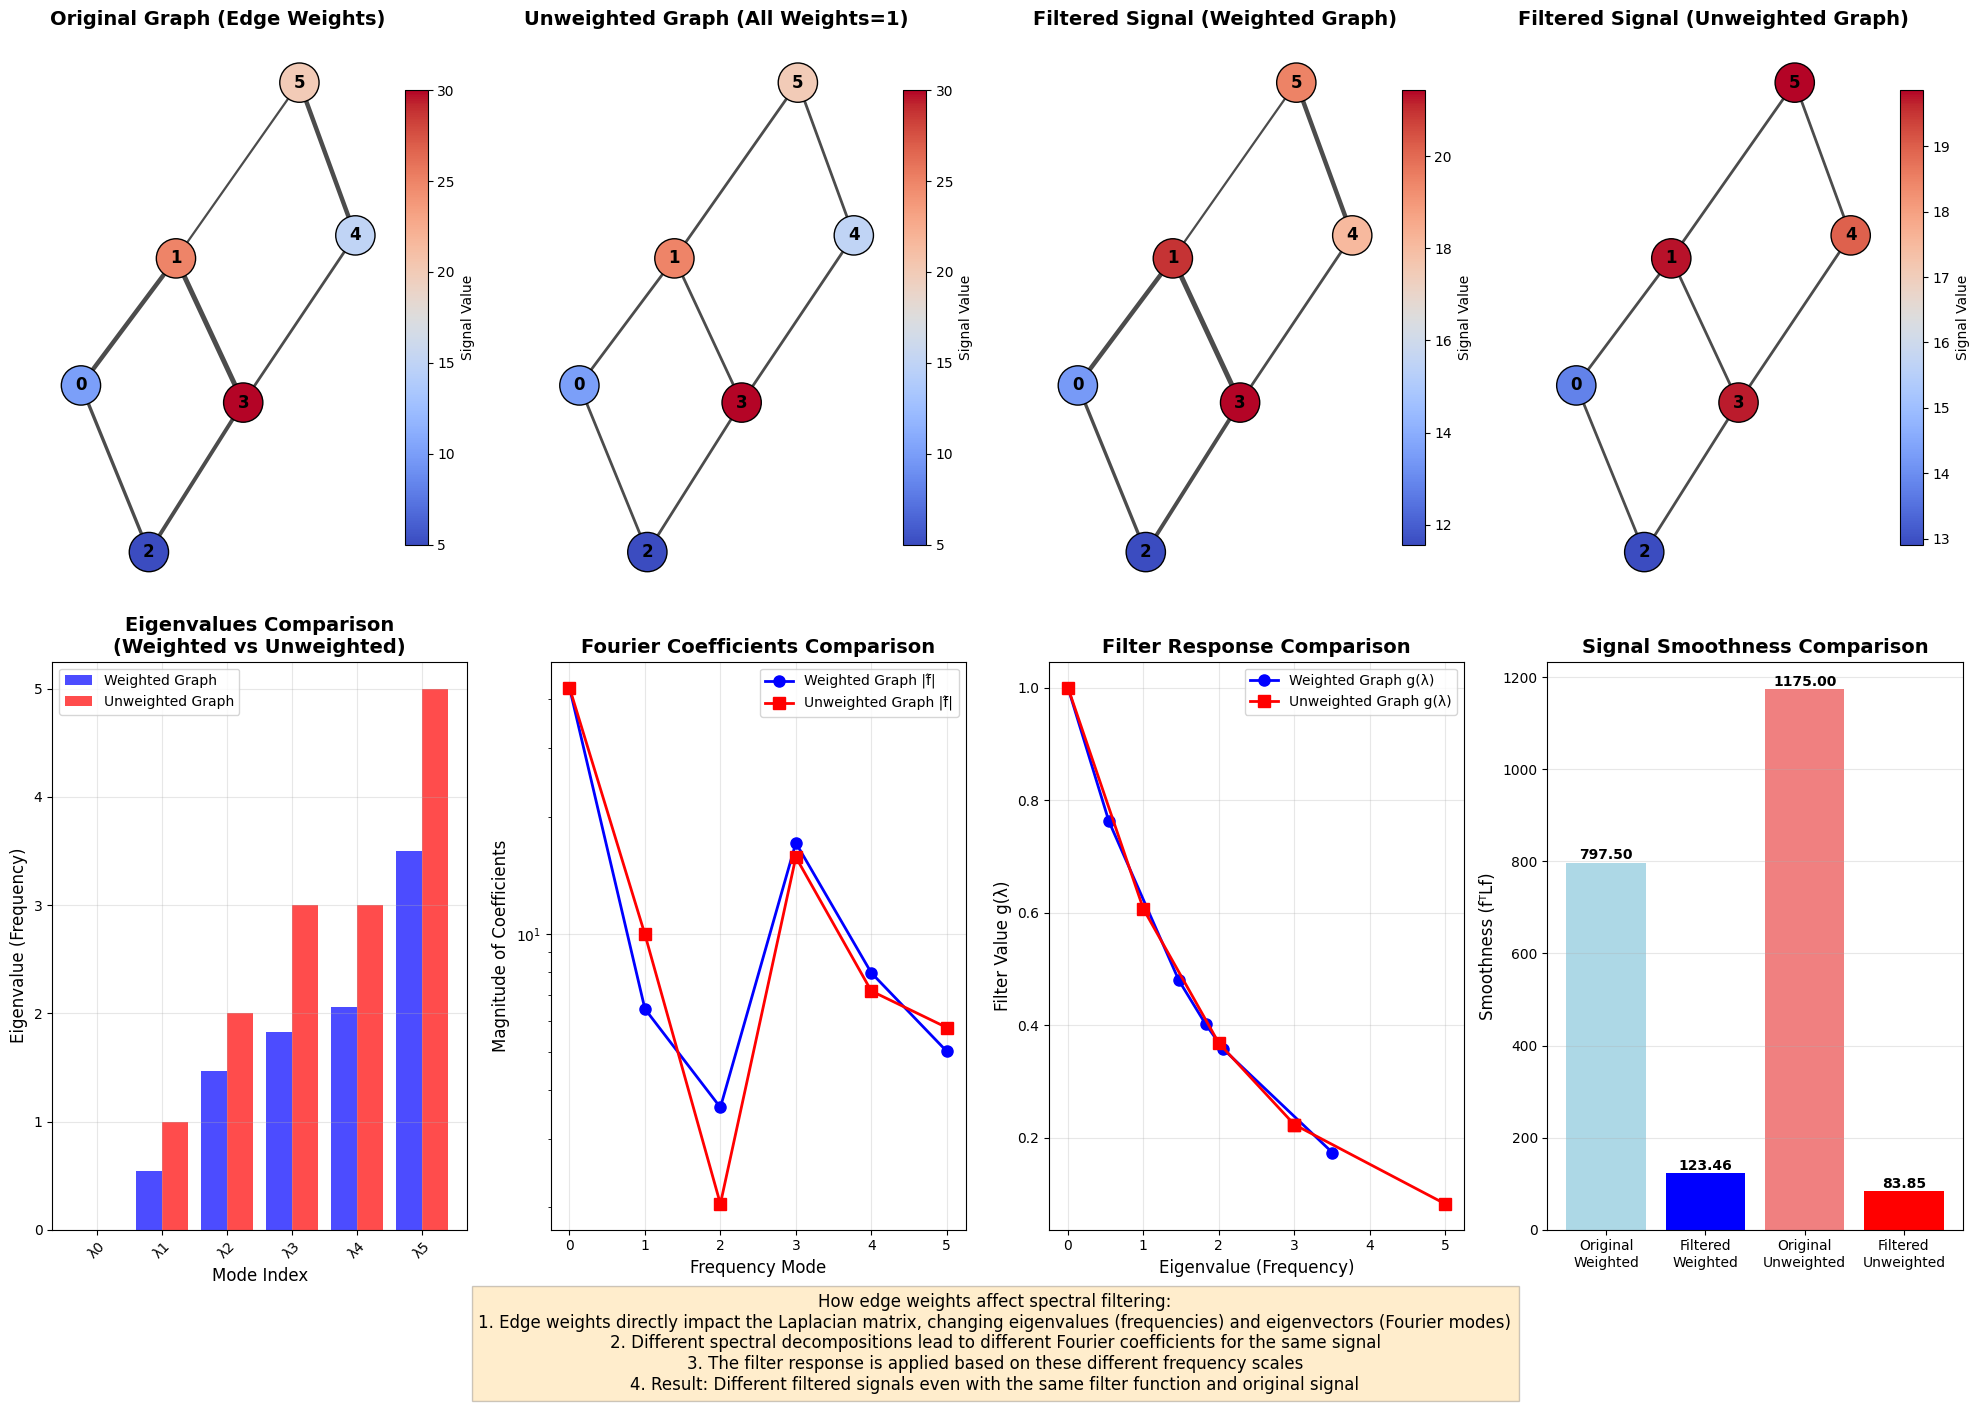


SUMMARY AND ANALYSIS: HOW EDGE WEIGHTS AFFECT SPECTRAL METHODS
Original signal: [10. 25.  5. 30. 15. 20.]
Filtered signal (weighted graph): [13.43835814 20.93889658 11.5660405  21.43739768 18.1112083  19.50809879]
Filtered signal (unweighted graph): [13.79507043 19.76425114 12.90832137 19.69835206 18.97362797 19.86037703]

Signal smoothness (Laplacian quadratic form):
  Original signal on weighted graph: 797.5000
  Filtered signal on weighted graph: 123.4557
  Original signal on unweighted graph: 1175.0000
  Filtered signal on unweighted graph: 83.8471

Smoothness improvement (lower is smoother):
  Weighted graph: 6.46x smoother
  Unweighted graph: 14.01x smoother

Key differences in spectral properties:
  Sum of eigenvalues (weighted): 9.4000
  Sum of eigenvalues (unweighted): 14.0000
  Maximum eigenvalue (weighted): 3.5046
  Maximum eigenvalue (unweighted): 5.0000

The spectral decomposition (eigenvalues and eigenvectors) is fundamentally different
between weighted and unweighted gr

In [3]:
# Step 7: Visualize the results with enhanced plots showing edge weight impact
print("\nStep 7: Visualizing results with edge weight impact analysis...")

# Create a layout for the graph (same for all visualizations)
pos = nx.spring_layout(G_weighted, seed=42)

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# Plot 1: Original Graph with Edge Weights
ax1 = plt.subplot(2, 4, 1)
ax1.set_title("Original Graph (Edge Weights)", fontsize=14, fontweight='bold')
edge_widths_weighted = [G_weighted[u][v]['weight'] * 4 for u, v in G_weighted.edges()]
nx.draw_networkx_edges(G_weighted, pos, alpha=0.7, width=edge_widths_weighted, ax=ax1)
nodes1 = nx.draw_networkx_nodes(G_weighted, pos, node_color=f, cmap='coolwarm',
                               node_size=800, edgecolors='black', ax=ax1)
nx.draw_networkx_labels(G_weighted, pos, font_size=12, font_weight='bold', ax=ax1)
sm1 = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=f.min(), vmax=f.max()))
sm1.set_array([])
plt.colorbar(sm1, ax=ax1, shrink=0.8, label='Signal Value')
ax1.axis('off')

# Plot 2: Unweighted Graph (for comparison)
ax2 = plt.subplot(2, 4, 2)
ax2.set_title("Unweighted Graph (All Weights=1)", fontsize=14, fontweight='bold')
edge_widths_unweighted = [2.0 for _ in G_unweighted.edges()]  # Uniform width
nx.draw_networkx_edges(G_unweighted, pos, alpha=0.7, width=edge_widths_unweighted, ax=ax2)
nodes2 = nx.draw_networkx_nodes(G_unweighted, pos, node_color=f, cmap='coolwarm',
                               node_size=800, edgecolors='black', ax=ax2)
nx.draw_networkx_labels(G_unweighted, pos, font_size=12, font_weight='bold', ax=ax2)
sm2 = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=f.min(), vmax=f.max()))
sm2.set_array([])
plt.colorbar(sm2, ax=ax2, shrink=0.8, label='Signal Value')
ax2.axis('off')

# Plot 3: Filtered Signal on Weighted Graph
ax3 = plt.subplot(2, 4, 3)
ax3.set_title("Filtered Signal (Weighted Graph)", fontsize=14, fontweight='bold')
nx.draw_networkx_edges(G_weighted, pos, alpha=0.7, width=edge_widths_weighted, ax=ax3)
nodes3 = nx.draw_networkx_nodes(G_weighted, pos, node_color=f_filtered_weighted, cmap='coolwarm',
                               node_size=800, edgecolors='black', ax=ax3)
nx.draw_networkx_labels(G_weighted, pos, font_size=12, font_weight='bold', ax=ax3)
sm3 = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=f_filtered_weighted.min(), vmax=f_filtered_weighted.max()))
sm3.set_array([])
plt.colorbar(sm3, ax=ax3, shrink=0.8, label='Signal Value')
ax3.axis('off')

# Plot 4: Filtered Signal on Unweighted Graph
ax4 = plt.subplot(2, 4, 4)
ax4.set_title("Filtered Signal (Unweighted Graph)", fontsize=14, fontweight='bold')
nx.draw_networkx_edges(G_unweighted, pos, alpha=0.7, width=edge_widths_unweighted, ax=ax4)
nodes4 = nx.draw_networkx_nodes(G_unweighted, pos, node_color=f_filtered_unweighted, cmap='coolwarm',
                               node_size=800, edgecolors='black', ax=ax4)
nx.draw_networkx_labels(G_unweighted, pos, font_size=12, font_weight='bold', ax=ax4)
sm4 = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=f_filtered_unweighted.min(), vmax=f_filtered_unweighted.max()))
sm4.set_array([])
plt.colorbar(sm4, ax=ax4, shrink=0.8, label='Signal Value')
ax4.axis('off')

# Plot 5: Comparison of Eigenvalues (Frequencies)
ax5 = plt.subplot(2, 4, 5)
ax5.set_title("Eigenvalues Comparison\n(Weighted vs Unweighted)", fontsize=14, fontweight='bold')
x_positions = np.arange(len(eigenvals_weighted))
ax5.bar(x_positions - 0.2, eigenvals_weighted, width=0.4, label='Weighted Graph', color='blue', alpha=0.7)
ax5.bar(x_positions + 0.2, eigenvals_unweighted, width=0.4, label='Unweighted Graph', color='red', alpha=0.7)
ax5.set_xlabel('Mode Index', fontsize=12)
ax5.set_ylabel('Eigenvalue (Frequency)', fontsize=12)
ax5.legend()
ax5.grid(True, alpha=0.3)
ax5.set_xticks(x_positions)
ax5.set_xticklabels([f'λ{i}' for i in range(len(eigenvals_weighted))], rotation=45)

# Plot 6: Comparison of Fourier Coefficients
ax6 = plt.subplot(2, 4, 6)
ax6.set_title("Fourier Coefficients Comparison", fontsize=14, fontweight='bold')
ax6.plot(x_positions, np.abs(f_hat_weighted), 'o-', label='Weighted Graph |f̂|', linewidth=2, markersize=8, color='blue')
ax6.plot(x_positions, np.abs(f_hat_unweighted), 's-', label='Unweighted Graph |f̂|', linewidth=2, markersize=8, color='red')
ax6.set_xlabel('Frequency Mode', fontsize=12)
ax6.set_ylabel('Magnitude of Coefficients', fontsize=12)
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_yscale('log')

# Plot 7: Filter Response Comparison
ax7 = plt.subplot(2, 4, 7)
ax7.set_title("Filter Response Comparison", fontsize=14, fontweight='bold')
ax7.plot(eigenvals_weighted, g_lambda_weighted, 'o-', label='Weighted Graph g(λ)', linewidth=2, markersize=8, color='blue')
ax7.plot(eigenvals_unweighted, g_lambda_unweighted, 's-', label='Unweighted Graph g(λ)', linewidth=2, markersize=8, color='red')
ax7.set_xlabel('Eigenvalue (Frequency)', fontsize=12)
ax7.set_ylabel('Filter Value g(λ)', fontsize=12)
ax7.legend()
ax7.grid(True, alpha=0.3)

# Plot 8: Smoothness Comparison (Laplacian Quadratic Form)
ax8 = plt.subplot(2, 4, 8)
ax8.set_title("Signal Smoothness Comparison", fontsize=14, fontweight='bold')

# Calculate smoothness for original and filtered signals on both graphs
original_smoothness_weighted = f.T @ L_weighted @ f
filtered_smoothness_weighted = f_filtered_weighted.T @ L_weighted @ f_filtered_weighted
original_smoothness_unweighted = f.T @ L_unweighted @ f
filtered_smoothness_unweighted = f_filtered_unweighted.T @ L_unweighted @ f_filtered_unweighted

categories = ['Original\nWeighted', 'Filtered\nWeighted', 'Original\nUnweighted', 'Filtered\nUnweighted']
smoothness_values = [original_smoothness_weighted, filtered_smoothness_weighted,
                    original_smoothness_unweighted, filtered_smoothness_unweighted]
colors = ['lightblue', 'blue', 'lightcoral', 'red']

bars = ax8.bar(categories, smoothness_values, color=colors)
ax8.set_ylabel('Smoothness (fᵀLf)', fontsize=12)
ax8.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(smoothness_values):
    ax8.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Add explanation text
plt.figtext(0.5, 0.02,
            "How edge weights affect spectral filtering:\n" +
            "1. Edge weights directly impact the Laplacian matrix, changing eigenvalues (frequencies) and eigenvectors (Fourier modes)\n" +
            "2. Different spectral decompositions lead to different Fourier coefficients for the same signal\n" +
            "3. The filter response is applied based on these different frequency scales\n" +
            "4. Result: Different filtered signals even with the same filter function and original signal",
            ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Adjust layout to make room for text
plt.show()

# Print summary and analysis
print("\n" + "="*80)
print("SUMMARY AND ANALYSIS: HOW EDGE WEIGHTS AFFECT SPECTRAL METHODS")
print("="*80)
print(f"Original signal: {f}")
print(f"Filtered signal (weighted graph): {f_filtered_weighted}")
print(f"Filtered signal (unweighted graph): {f_filtered_unweighted}")

print(f"\nSignal smoothness (Laplacian quadratic form):")
print(f"  Original signal on weighted graph: {original_smoothness_weighted:.4f}")
print(f"  Filtered signal on weighted graph: {filtered_smoothness_weighted:.4f}")
print(f"  Original signal on unweighted graph: {original_smoothness_unweighted:.4f}")
print(f"  Filtered signal on unweighted graph: {filtered_smoothness_unweighted:.4f}")

print(f"\nSmoothness improvement (lower is smoother):")
print(f"  Weighted graph: {original_smoothness_weighted/filtered_smoothness_weighted:.2f}x smoother")
print(f"  Unweighted graph: {original_smoothness_unweighted/filtered_smoothness_unweighted:.2f}x smoother")

print(f"\nKey differences in spectral properties:")
print(f"  Sum of eigenvalues (weighted): {np.sum(eigenvals_weighted):.4f}")
print(f"  Sum of eigenvalues (unweighted): {np.sum(eigenvals_unweighted):.4f}")
print(f"  Maximum eigenvalue (weighted): {np.max(eigenvals_weighted):.4f}")
print(f"  Maximum eigenvalue (unweighted): {np.max(eigenvals_unweighted):.4f}")

print(f"\nThe spectral decomposition (eigenvalues and eigenvectors) is fundamentally different")
print(f"between weighted and unweighted graphs, even when the graph topology is identical.")
print(f"This demonstrates that edge weights are CRUCIAL in spectral graph methods, as they")
print(f"directly determine the 'frequency' interpretation of graph signals.")

print(f"\nAccording to the KDD2021 tutorial (Slide 26):")
print(f"  \"Laplacian quadratic form: fᵀLf = 1/2 Σᵢⱼ A[i,j](f(i)-f(j))²\"")
print(f"  This measures the 'Smoothness' or 'Frequency' of the signal, and A[i,j] are the edge weights!")
print(f"Therefore, edge weights directly scale the smoothness calculation and thus the entire spectral analysis.")